<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)
soup = bs4.BeautifulSoup(result.text)

In [0]:
titles = [tag.text.strip() 
          for tag in soup.select('h2')]

In [38]:
titles

['A Bit about Bytes: Understanding Python Bytecode',
 'Adapting from Spark to Dask: what to expect',
 'All in the timing: How side channel attacks work',
 'Analyzing Data: What pandas and SQL Taught Me About Taking an Average',
 'A practical guide to Singular Value Decomposition in Python',
 'Augmenting Human Decision Making with Data Science',
 'Automating Code Quality',
 'Bayesian Non-parametric Models for Data Science using PyMC3',
 'Behavior-Driven Python',
 "Beyond scraping: how to use machine learning when you're not sure where to start",
 'Beyond Unit Tests: Taking Your Testing to the Next Level',
 'Big-O: How Code Slows as Data Grows',
 'Birding with Python and Machine Learning',
 'Bowerbirds of Technology: Architecture and Teams at Less-than-Google Scale',
 'Building a cross-platform native app with BeeWare',
 'Building a Data Pipeline with Testing in Mind',
 'Build Teams as an Engineer',
 'By the Numbers: Python Community Trends in 2017/2018',
 'Clearer Code at Scale: Static 

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [5]:
long_titles = []
for title in titles:
    if len(title) > 80:
        long_titles.append(title)
        
long_titles

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 2. List Comprehension

In [6]:
[title for title in titles 
 if len(title) > 80]

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 3. Filter with named function

In [7]:
def long(title):
    return len(title) > 80

list(filter(long, titles))

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 4. Filter with anonymous function

In [8]:
list(filter(lambda t: len(t) > 80, titles))

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [10]:
df = pd.DataFrame({'title': titles})
df[df.title.str.len() > 80]

,title
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability"
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions"
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [0]:
df['title length'] = df.title.apply(len)

In [12]:
df[df['title length'] > 80]

,title,title length
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability",89
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus,100
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline,89
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions",82
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications,84


In [13]:
df.loc[df['title length'] > 80, 'title length']

19     89
28    100
46     89
51     82
78     84
Name: title length, dtype: int64

### long title

In [0]:
df['long title'] = df['title length'] > 80

In [15]:
df[df['long title']==True]

,title,title length,long title
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability",89,True
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus,100,True
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline,89,True
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions",82,True
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications,84,True


### first letter

In [0]:
df['first letter'] = df.title.str[0]

In [17]:
df[df['first letter']=='P']

,title,title length,long title,first letter
55,Performance Python: Seven Strategies for Optimizing Your Numerical Code,71,False,P
56,Pipenv: The Future of Python Dependency Management,50,False,P
57,Practical Sphinx,16,False,P
58,Programming microbes using Python,33,False,P
59,Pumping up Python modules using Rust,36,False,P
60,Python 2 to 3: How to Upgrade and What Features to Start Using,62,False,P
61,Python 3: ten years later,25,False,P
62,Python across the USA: This is the Bus.,39,False,P
63,Python Data Sonification for Science and Discovery,50,False,P
64,Python for the quantum computing age,36,False,P


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [18]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 7.1MB/s 
  Running setup.py bdist_wheel for textstat ... - done
  Stored in directory: /root/.cache/pip/wheels/04/ac/d7/a05c0ad7825899f11eacd5f9a5a78534808c8159281e65863c
Successfully built textstat


In [0]:
import textstat

In [0]:
df['title word count'] = df.title.apply(textstat.lexicon_count)

In [21]:
df[df['title word count'] <= 3]

,title,title length,long title,first letter,title word count
6,Automating Code Quality,23,False,A,3
8,Behavior-Driven Python,22,False,B,2
21,Coding through Adversity,24,False,C,3
52,Love your bugs,14,False,L,3
57,Practical Sphinx,16,False,P,2
76,Taking Django Async,19,False,T,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
df = df.rename(columns={'title length': 'title character count'})

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [23]:
df.describe()

,title character count,title word count
count,95.000000,95.000000
mean,46.442105,7.189474
std,17.560664,2.903757
min,14.000000,2.000000
25%,35.000000,5.000000
50%,45.000000,7.000000
75%,56.000000,9.000000
max,100.000000,19.000000


In [24]:
import numpy as np
df.describe(exclude=np.number)

,title,long title,first letter
count,95,95,95
unique,95,2,21
top,Thinking Outside the GIL with AsyncIO and Multiprocessing,False,P
freq,1,90,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [25]:
df.sort_values(by='title character count').head(5)

,title,title character count,long title,first letter,title word count
52,Love your bugs,14,False,L,3
77,The AST and Me,14,False,T,4
57,Practical Sphinx,16,False,P,2
76,Taking Django Async,19,False,T,3
44,HOWTO Write a Function,22,False,H,4


Titles sorted reverse alphabetically

In [0]:
df['first letter'] = df['first letter'].str.upper()

In [27]:
df.sort_values(by='first letter', ascending=False).head()

,title,title character count,long title,first letter,title word count
94,You're an expert. Here's how to teach like one.,47,False,Y,9
93,Win back lovely API: GraphQL in Python,38,False,W,7
91,What is a Python Core Developer?,32,False,W,6
90,Visual Testing with PyCharm and pytest,38,False,V,6
89,Visualizing Algorithms with Python and Programmable LEDs,56,False,V,7


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [28]:
df['first letter'].value_counts()

P    12
B    11
T    11
C     8
D     7
A     7
S     6
E     5
H     5
R     3
F     3
L     3
V     2
G     2
I     2
U     2
W     2
O     2
"     1
Y     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [29]:
df['long title'].value_counts(normalize=True)

False    0.947368
True     0.052632
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

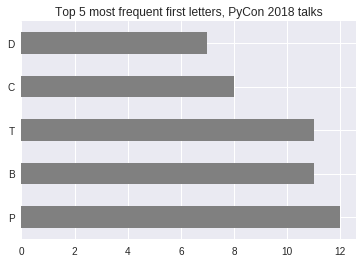

In [30]:
%matplotlib inline

(df['first letter']
 .value_counts()
 .head(5)
 .plot
 .barh(color='grey', 
       title='Top 5 most frequent first letters, PyCon 2018 talks'));

Histogram of title lengths, in characters

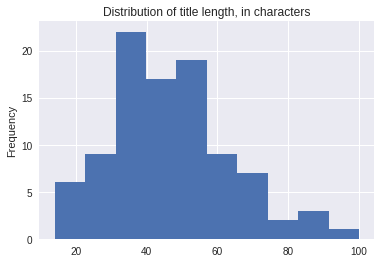

In [31]:
title = 'Distribution of title length, in characters'
df['title character count'].plot.hist(title=title);

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.



In [0]:
# Scrape descriptions

d = [tag.text.strip() 
          for tag in soup.select('.presentation-description')]

In [0]:
# New columns

df['description'] = [i for i in d]
df['desc_char_count'] = df.description.apply(len)
df['desc_word_count'] = df.description.apply(textstat.lexicon_count)
df['desc_grade_level'] = df.description.apply(textstat.flesch_kincaid_grade)

In [60]:
# Description of data
# Average description word count is 134
# Min is 35 words, max is 436 words
 

,title character count,title word count,desc_char_count,desc_word_count,desc_grade_level
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,46.442105,7.189474,846.063158,134.578947,18.117895
std,17.560664,2.903757,450.107713,70.019082,15.835652
min,14.000000,2.000000,201.000000,35.000000,3.700000
25%,35.000000,5.000000,550.000000,91.500000,10.500000
50%,45.000000,7.000000,758.000000,119.000000,13.800000
75%,56.000000,9.000000,978.000000,149.500000,17.950000
max,100.000000,19.000000,2794.000000,436.000000,107.800000


In [67]:
# Which descriptions could fit in a Tweet?

# New boolean value column will tell us... 

df['desc_could_fit_intweet'] = df['desc_char_count'] <= 280

df['description'][df['desc_could_fit_intweet'] == True]

44    A function is a small chunk of code that does useful work. Your job when writing a function is to do it in a way that it easy to read. Based on over 15 years of code reviews here are some tips and...
62    For 2 years, a family of three has traveled on a converted school bus from conference to conference, building tooling for the road in Python and visiting Python families in every corner of the cou...
65    Python 3 removes a lot of the confusion around Unicode handling in Python, but that by no means fixes everything. Different locales and writing systems have unique behaviours that can trip you up....
Name: description, dtype: object

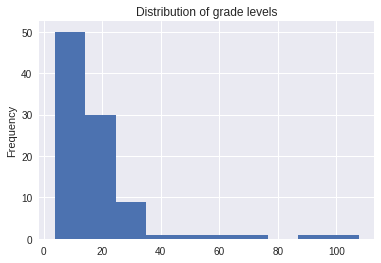

In [81]:
# Distribution of grade levels plot

title = 'Distribution of grade levels'
df['desc_grade_level'].plot.hist(title=title);